# Лабораторна №1
### Лінійна регресія
ФІ-21, Голуб Михайло

### Набір даних
Обрано набір даних *Public transport traffic data in France*

In [154]:
%pip install kagglehub[pandas-datasets]
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("gatandubuc/public-transport-traffic-data-in-france")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\misha\.cache\kagglehub\datasets\gatandubuc\public-transport-traffic-data-in-france\versions\1


In [156]:
import pandas as pd
df = pd.read_csv(path+"\Regularities_by_liaisons_Trains_France.csv")
df.head(5)

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\misha\AppData\Local\Temp\ipykernel_1256\1728913230.py:2: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv(path+"\Regularities_by_liaisons_Trains_France.csv")


,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


# Підготовчий етап

### Опис датасету:

About this file

It includes data linked to each liaisons per month. Like the number of expected trains from Paris to Marseille in august 2019, the real number of trains and the number of delayed trains.

Also, TGV regularity takes into account the different travel times of customers (also called composite).

A train is considered on time if its delay at the terminus is less than 5 minutes for a journey of less than 1h30.
A train is considered on time if its delay at the terminus is less than 10min for a trip between 1h30 and 3h.
A train is considered on time if its delay at the terminus is less than 15min for a journey of more than 3 hours.

Arrival times are also determined by sensors detecting the passage of the train at a specific point marking the entry to the station and exceptionally by manual monitoring. The accuracy of the measurements is the minute rounded down to the nearest minute, which is in line with all the standards used to draw up service schedules and timetables.
The overall regularity result is neither the average of the results of the 6 axes, nor the average of the results of all the links. In fact, the regularity rate is the number of trains per hour at their terminus out of the total number of trains that have run on the perimeter in question. In addition, the same TGV can count in several links, but it counts only once in the overall regularity. The figures in this dataset should therefore not be used to calculate an overall TGV or axis regularity.

### Аналіз датасету

In [157]:
print("rows:",len(df))
print("columns:",len(df.columns))
for column in df.columns:
    print(column, type(df[column][0]))
df.count()

rows: 7806
columns: 32
Year <class 'numpy.int64'>
Month <class 'numpy.float64'>
Departure station <class 'str'>
Arrival station <class 'str'>
Average travel time (min) <class 'numpy.float64'>
Number of expected circulations <class 'numpy.float64'>
Number of cancelled trains <class 'numpy.float64'>
Number of late trains at departure <class 'numpy.float64'>
Average delay of late departing trains (min) <class 'numpy.float64'>
Average delay of all departing trains (min) <class 'numpy.float64'>
Comment (optional) delays at departure <class 'numpy.float64'>
Number of trains late on arrival <class 'numpy.float64'>
Average delay of late arriving trains (min) <class 'numpy.float64'>
Average delay of all arriving trains (min) <class 'numpy.float64'>
Comment (optional) delays on arrival <class 'float'>
% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) <class 'numpy.float64'>
% trains late due to railway infrastructure (maintenance,

Year                                                                                                                   7806
Month                                                                                                                  7806
Departure station                                                                                                      7806
Arrival station                                                                                                        7806
Average travel time (min)                                                                                              7743
Number of expected circulations                                                                                        7743
Number of cancelled trains                                                                                             7806
Number of late trains at departure                                                                                     7806
Average 

Датасет містить щомісячну інформацію про беззупинкові потяги між станціями Франції: заплановану та фактичну кількість, запізнення та джерело запізнень, середній час подорожі, т.і. Датасет складається з 7806 рядків та 32 колонок. Три колонки містять текстові дані: Arrival station, Departure station, Period. Дві колонки допоміжні та містять коментарії лише в деяких рядках.

### Визначення вхідних та вихідних параметрів

Вхідні параметри:
* Year
* Month
* Number of expected circulations

Можуть бути вхідними параметрами:
* Number of cancelled trains,
* Number of late trains at departure

Не числові колонки:
* Departure station
* Arrival station
* Comment (optional) delays at departure
* Comment (optional) delays on arrival
* Period

Усі інші параметри -- вихідні

In [158]:
df = df.drop(["Departure station", "Arrival station", "Comment (optional) delays at departure", "Comment (optional) delays on arrival", "Period"], axis = 1)

### Візуалізація залежності входів та виходу

C:\Users\misha\AppData\Local\Temp\ipykernel_1256\1708750705.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


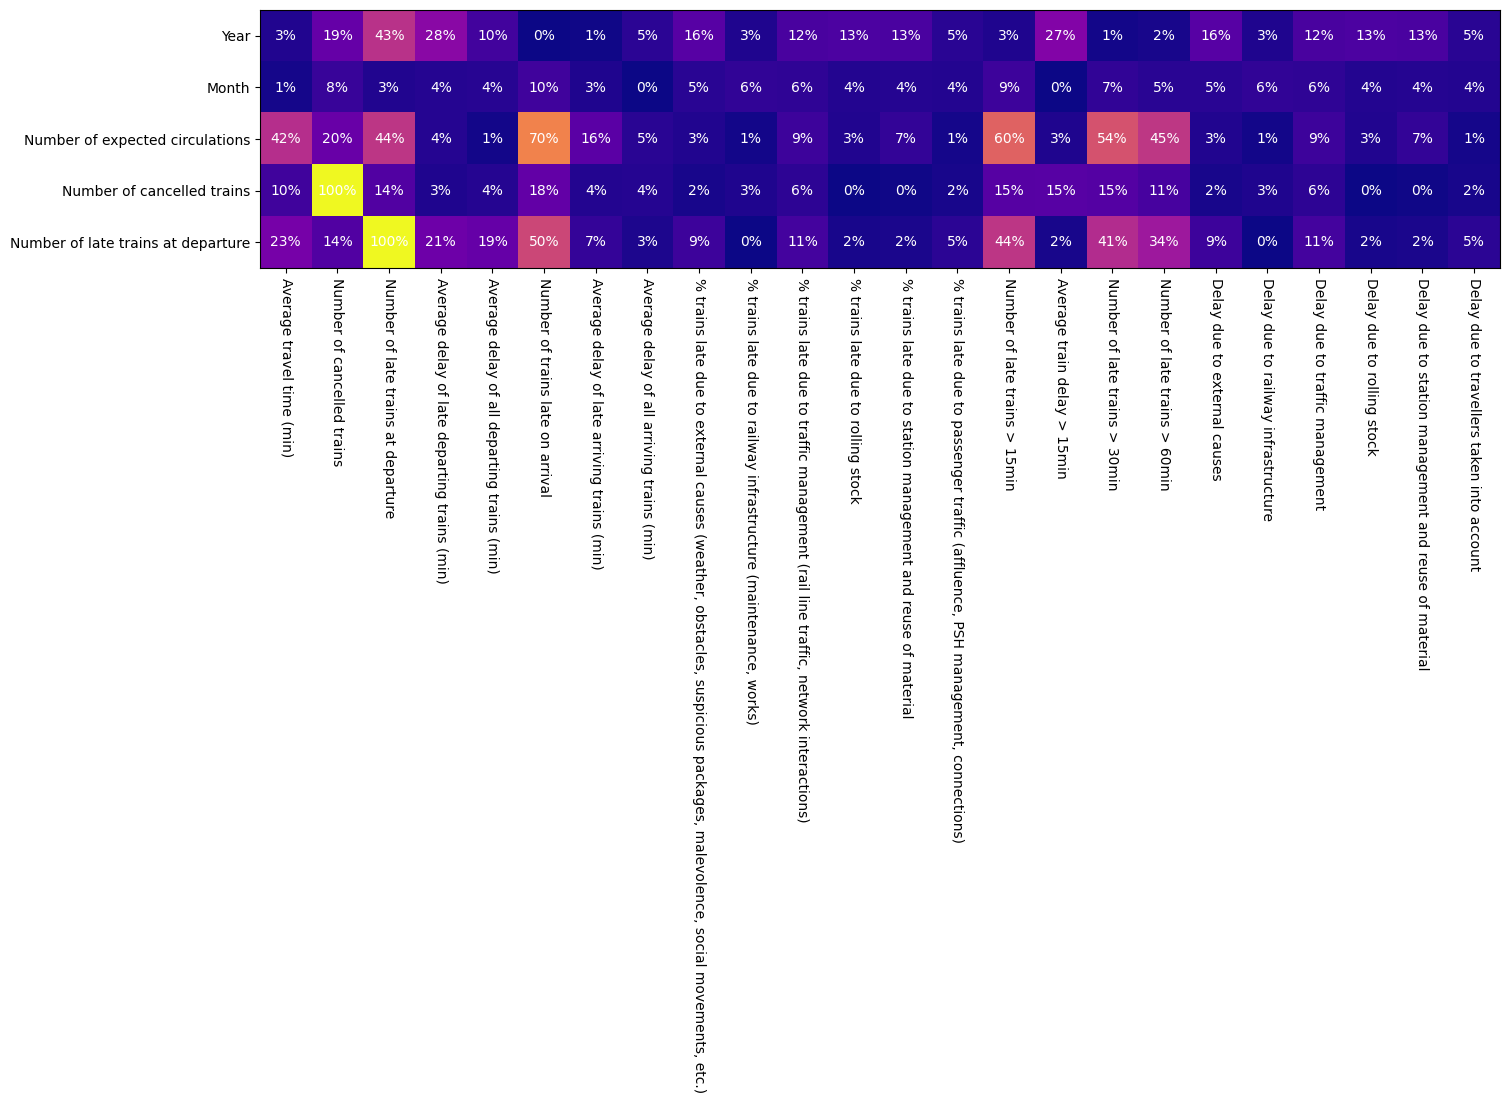

In [159]:
from matplotlib import pyplot as plt

inputs = ["Year",
        "Month",
        "Number of expected circulations", 
        "Number of cancelled trains", 
        "Number of late trains at departure"]
outputs = ["Average travel time (min)",
           "Number of cancelled trains",
           "Number of late trains at departure",
           "Average delay of late departing trains (min)",
           "Average delay of all departing trains (min)",
           "Number of trains late on arrival",
           "Average delay of late arriving trains (min)",
           "Average delay of all arriving trains (min)",
           "% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)",
           "% trains late due to railway infrastructure (maintenance, works)",
           "% trains late due to traffic management (rail line traffic, network interactions)",
           "% trains late due to rolling stock",
           "% trains late due to station management and reuse of material",
           "% trains late due to passenger traffic (affluence, PSH management, connections)",
           "Number of late trains > 15min",
           "Average train delay > 15min",
           "Number of late trains > 30min",
           "Number of late trains > 60min",
           "Delay due to external causes",
           "Delay due to railway infrastructure",
           "Delay due to traffic management",
           "Delay due to rolling stock",
           "Delay due to station management and reuse of material",
           "Delay due to travellers taken into account"]

fig, ax = plt.subplots()

corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])

ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Лише значно корельовані величини:

C:\Users\misha\AppData\Local\Temp\ipykernel_1256\1099400720.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


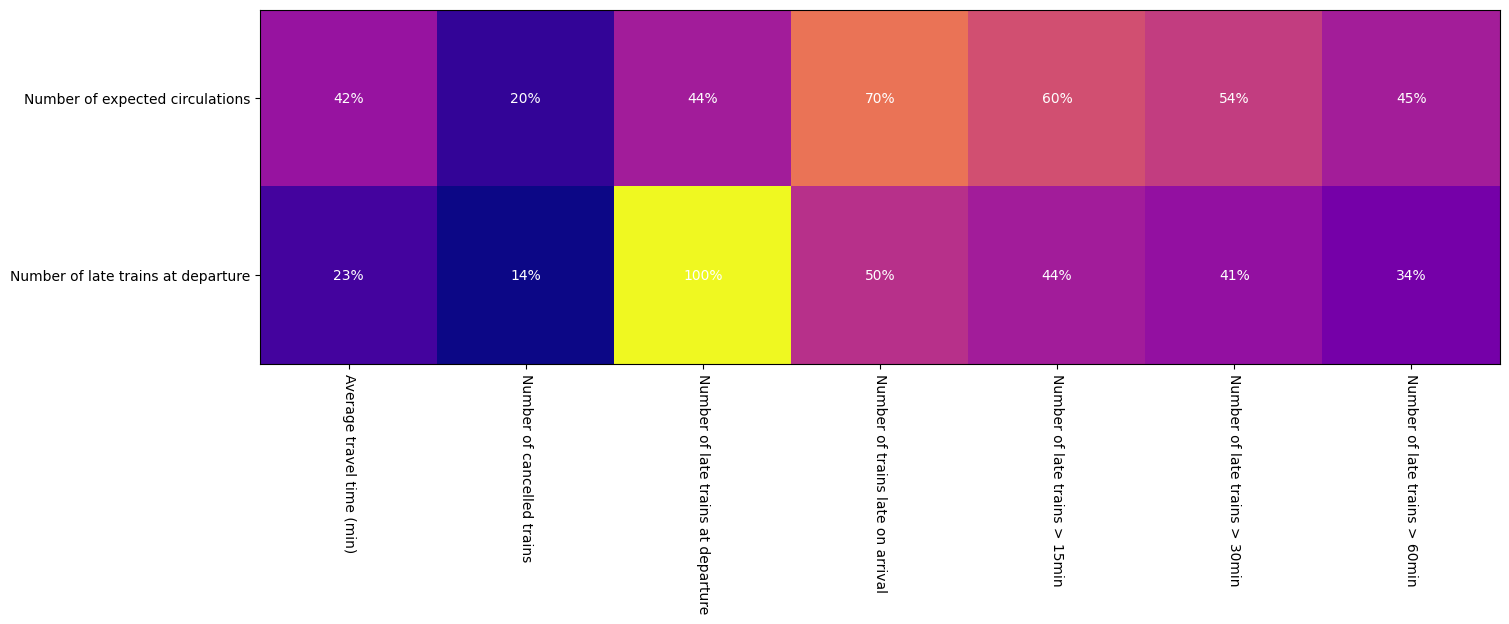

In [160]:
inputs = ["Number of expected circulations", 
        "Number of late trains at departure"]
outputs = ["Average travel time (min)",
           "Number of cancelled trains",
           "Number of late trains at departure",
           "Number of trains late on arrival",
           "Number of late trains > 15min",
           "Number of late trains > 30min",
           "Number of late trains > 60min",]
fig, ax = plt.subplots()
corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])



ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

(<Axes: >, <matplotlib.collections.PathCollection at 0x2032d02fbf0>)

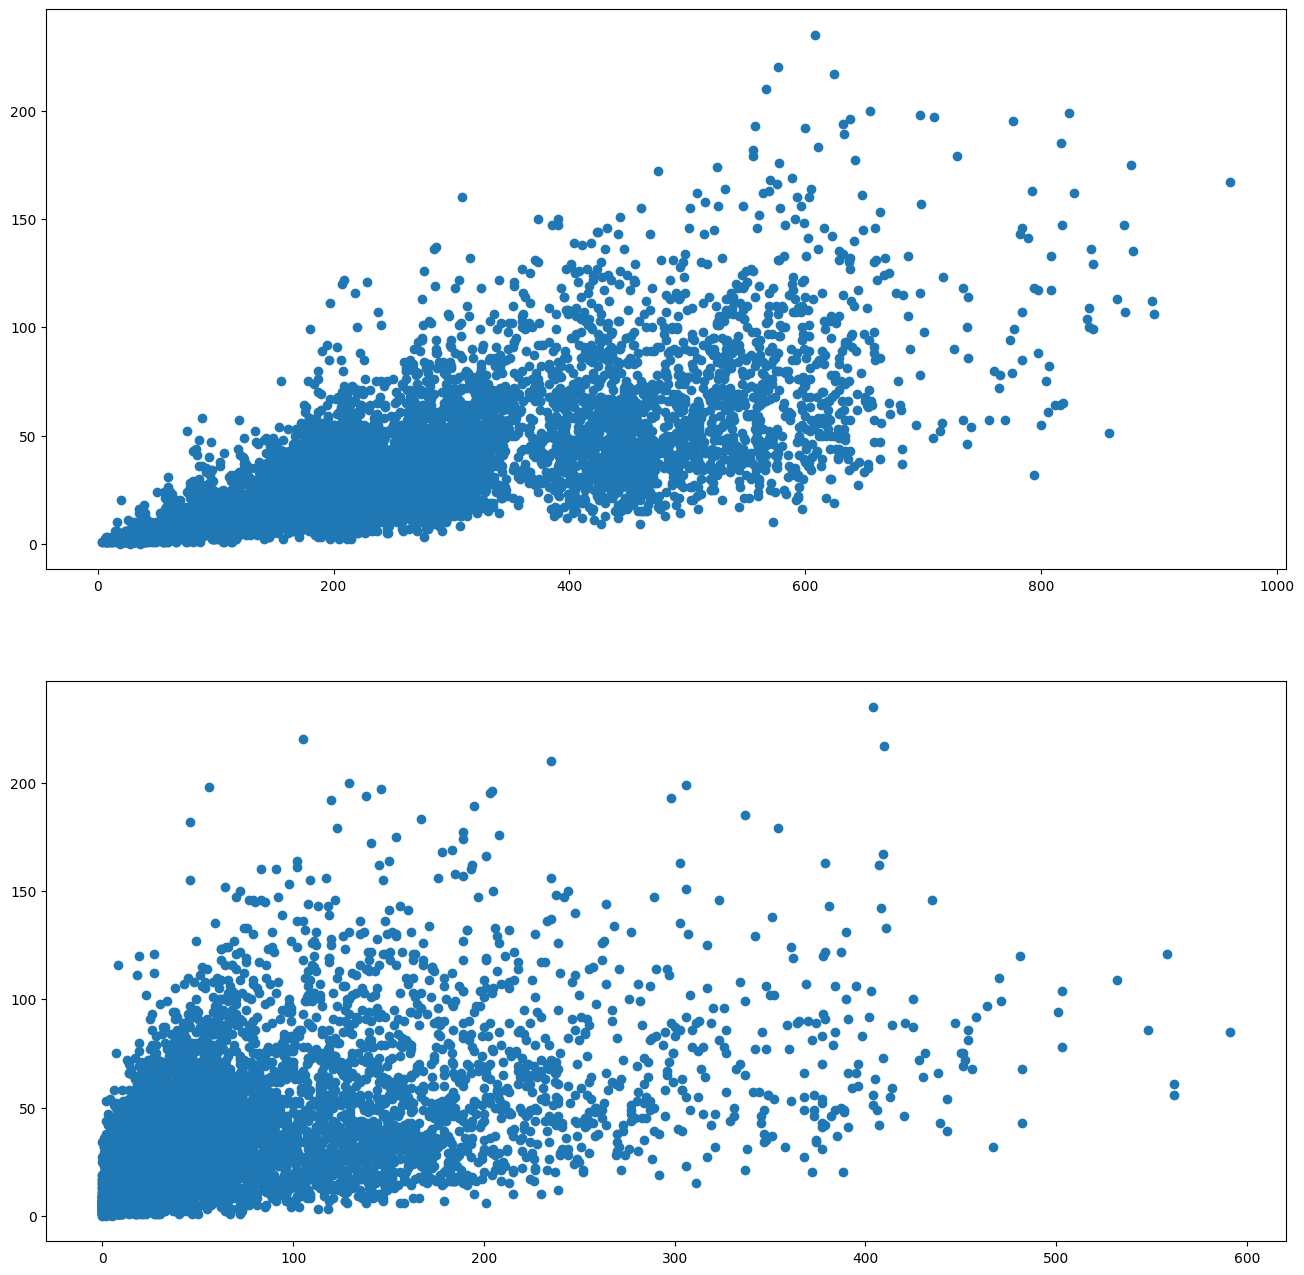

In [161]:
plt.subplot(211), plt.scatter(df["Number of expected circulations"], df["Number of trains late on arrival"]),
plt.subplot(212), plt.scatter(df["Number of late trains at departure"], df["Number of trains late on arrival"]),


Нехай задача передбачити *Number of trains late on arrival* знаючи *Number of expected circulations*

Підготовка даних до подальшого використання:

In [162]:
df = df[["Number of expected circulations", "Number of late trains at departure", "Number of trains late on arrival"]]
print(len(df))
df = df.dropna()

main = df[:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

7806


### SciKit learn